In [7]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#그래프에 한글 표현하기
import  matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family = font_name)

#마이너스 표시하기
import  matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]  = False


In [77]:
pop=pd.read_csv('군산시_연령별_동별_전처리.csv')
pop.index=pop["행정구역"]
pop=pop.iloc[:,1:]
pop


,10세 미만,10대,20대,30대,40대,50대,60대,70대,80대~
행정구역,,,,,,,,,
옥구읍,87,113,259,188,312,584,697,560,384
옥산면,580,370,371,724,721,688,618,385,263
회현면,179,357,244,215,483,557,599,460,360
임피면,65,111,231,146,247,479,632,434,332
서수면,72,110,168,162,256,438,590,418,375
대야면,155,234,348,360,518,815,1139,872,602
개정면,72,152,266,181,298,606,670,478,298
성산면,101,137,249,185,274,572,635,458,292
나포면,48,98,137,127,235,380,514,393,292


In [78]:
# 10대 top5
pop['10대'].sort_values(ascending=False).head(5)

행정구역
수송동     7709
나운3동    4232
나운2동    2935
조촌동     2100
소룡동     1645
Name: 10대, dtype: int64

In [79]:
# 20대 top5
pop['20대'].sort_values(ascending=False).head(5)

행정구역
수송동     6590
나운3동    4194
나운2동    2942
조촌동     2529
소룡동     1833
Name: 20대, dtype: int64

In [80]:
# 30대 top5
pop['30대'].sort_values(ascending=False).head(5)

행정구역
수송동     7644
조촌동     3778
나운3동    3563
나운2동    2190
소룡동     2087
Name: 30대, dtype: int64

In [81]:
# 40대 top5
pop['40대'].sort_values(ascending=False).head(5)

행정구역
수송동     10942
나운3동     6106
나운2동     3917
조촌동      3602
소룡동      3138
Name: 40대, dtype: int64

In [82]:
# 50대 top5
pop['50대'].sort_values(ascending=False).head(5)

행정구역
수송동     7927
나운3동    5519
나운2동    4139
소룡동     3083
조촌동     3080
Name: 50대, dtype: int64

In [84]:
# 60대 top5
pop['60대'].sort_values(ascending=False).head(5)

행정구역
수송동     4554
나운3동    3471
나운2동    3323
조촌동     2611
소룡동     2262
Name: 60대, dtype: int64

In [85]:
# 70대 top5
pop['70대'].sort_values(ascending=False).head(5)

행정구역
수송동     2230
나운3동    1778
나운2동    1693
조촌동     1384
흥남동     1227
Name: 70대, dtype: int64

In [86]:
# 80대 이상 top5
pop['80대~'].sort_values(ascending=False).head(5)

행정구역
수송동     1011
나운2동     969
나운3동     839
조촌동      610
대야면      602
Name: 80대~, dtype: int64

In [94]:
pop_수=pop[pop.index=='수송동'].T
pop_수["인구율%"]=((pop_수["수송동"]/pop_수["수송동"][:3].sum())*100).round(1)
pop_수.sort_values("인구율%", ascending=False)

행정구역,수송동,인구율%
40대,10942,52.0
50대,7927,37.7
10대,7709,36.6
30대,7644,36.3
10세 미만,6746,32.1
20대,6590,31.3
60대,4554,21.6
70대,2230,10.6
80대~,1011,4.8


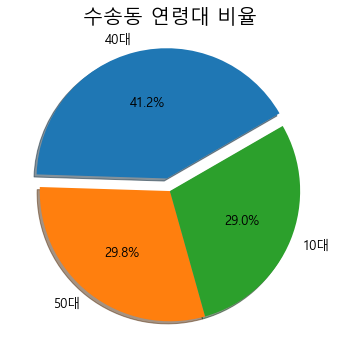

In [96]:
#piechart

pop_ascending=pop_수.sort_values("인구율%",ascending=False)
plt.figure(figsize=(10,5))


plt.subplot(121)
labels = pop_ascending.index[:3]
sizes =  pop_ascending['인구율%'].values[:3]
explode = (0.1, 0, 0)  
#fig, ax = plt.subplots()
plt.pie(sizes, labels=labels, 
        explode=explode, # explode=파이가 떨어진 정도
        autopct='%1.1f%%',
        shadow=True, startangle=30,
       textprops={'fontsize': 13})



plt.title('수송동 연령대 비율', fontsize=20)



plt.tight_layout()
plt.show()


In [105]:
pop_나=pop[pop.index=="나운3동"].T
pop_나["인구율%"]=((pop_나["나운3동"]/pop_나["나운3동"][:3].sum())*100).round(1)
pop_나.sort_values("인구율%", ascending=False)


행정구역,나운3동,인구율%
40대,6106,55.2
50대,5519,49.9
10대,4232,38.2
20대,4194,37.9
30대,3563,32.2
60대,3471,31.4
10세 미만,2643,23.9
70대,1778,16.1
80대~,839,7.6


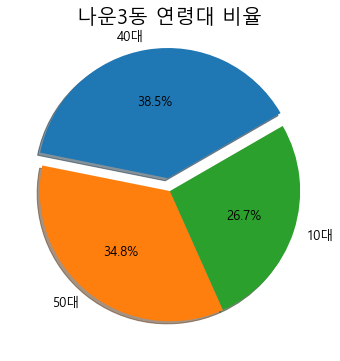

In [106]:


pop_ascending=pop_나.sort_values("인구율%",ascending=False)
plt.figure(figsize=(10,5))


plt.subplot(121)
labels = pop_ascending.index[:3]
sizes =  pop_ascending['인구율%'].values[:3]
explode = (0.1, 0, 0)  
#fig, ax = plt.subplots()
plt.pie(sizes, labels=labels, 
        explode=explode, # explode=파이가 떨어진 정도
        autopct='%1.1f%%',
        shadow=True, startangle=30,
       textprops={'fontsize': 13})



plt.title('나운3동 연령대 비율', fontsize=20)



plt.tight_layout()
plt.show()


In [108]:
pop_조=pop[pop.index=="조촌동"].T
pop_조["인구율%"]=((pop_조["조촌동"]/pop_조["조촌동"][:3].sum())*100).round(1)
pop_조.sort_values("인구율%", ascending=False)


행정구역,조촌동,인구율%
30대,3778,52.7
40대,3602,50.2
50대,3080,42.9
60대,2611,36.4
10세 미만,2544,35.5
20대,2529,35.3
10대,2100,29.3
70대,1384,19.3
80대~,610,8.5


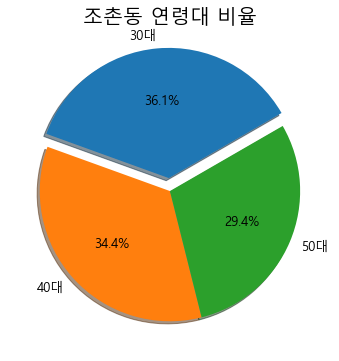

In [109]:


pop_ascending=pop_조.sort_values("인구율%",ascending=False)
plt.figure(figsize=(10,5))


plt.subplot(121)
labels = pop_ascending.index[:3]
sizes =  pop_ascending['인구율%'].values[:3]
explode = (0.1, 0, 0)  
#fig, ax = plt.subplots()
plt.pie(sizes, labels=labels, 
        explode=explode, # explode=파이가 떨어진 정도
        autopct='%1.1f%%',
        shadow=True, startangle=30,
       textprops={'fontsize': 13})



plt.title('조촌동 연령대 비율', fontsize=20)



plt.tight_layout()
plt.show()

In [111]:
pop_소=pop[pop.index=="소룡동"].T
pop_소["인구율%"]=((pop_소["소룡동"]/pop_소["소룡동"][:3].sum())*100).round(1)
pop_소.sort_values("인구율%", ascending=False)


행정구역,소룡동,인구율%
40대,3138,67.7
50대,3083,66.5
60대,2262,48.8
30대,2087,45.0
20대,1833,39.5
10대,1645,35.5
10세 미만,1160,25.0
70대,1084,23.4
80대~,463,10.0


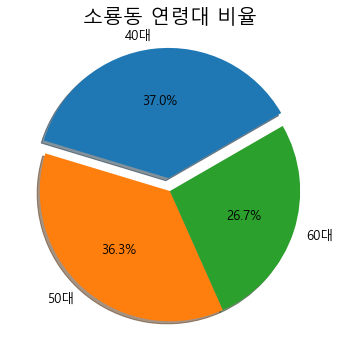

In [113]:

pop_ascending=pop_소.sort_values("인구율%",ascending=False)
plt.figure(figsize=(10,5))


plt.subplot(121)
labels = pop_ascending.index[:3]
sizes =  pop_ascending['인구율%'].values[:3]
explode = (0.1, 0, 0)  
#fig, ax = plt.subplots()
plt.pie(sizes, labels=labels, 
        explode=explode, # explode=파이가 떨어진 정도
        autopct='%1.1f%%',
        shadow=True, startangle=30,
       textprops={'fontsize': 13})



plt.title('소룡동 연령대 비율', fontsize=20)



plt.tight_layout()
plt.show()